In [29]:
from pathlib import Path 

import numpy as np
import pandas as pd
import ripleyk
import matplotlib.pyplot as plt

datafile = Path("../data/CoordTable_SAFE360_2D.csv")

In [4]:
data = pd.read_csv(datafile, index_col='id')
data

,frame,x [nm],y [nm],sigma [nm],intensity [photon],amplitude [photon],offset [photon],bkgstd [photon],uncertainty_xy [nm]
id,,,,,,,,,
1,70,51615.547,2154.220,79.102,235.0,114.776,331.724,38.516,58.186
2,79,36727.672,49770.348,264.460,3364.0,138.307,355.957,64.502,58.562
3,80,36453.328,49816.258,120.809,2105.0,180.869,363.170,46.063,17.234
4,81,36590.270,49777.688,248.678,1897.0,121.549,342.244,57.533,87.648
5,82,36494.426,49804.367,220.269,2758.0,139.515,338.218,56.976,50.806
...,...,...,...,...,...,...,...,...,...
81836,10000,28282.926,18930.887,136.997,3074.0,212.133,220.357,30.098,10.169
81837,10000,54746.852,25071.480,176.688,628.0,86.905,184.184,21.087,54.777
81838,10000,9126.955,33079.539,205.962,864.0,60.155,218.211,28.913,70.756


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

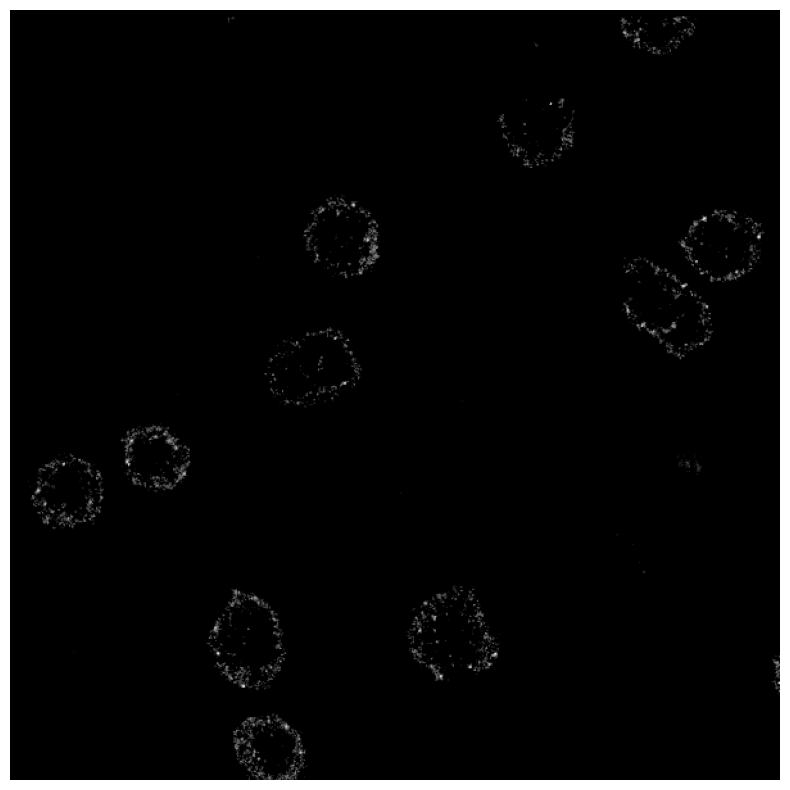

In [70]:
xs = data['x [nm]'].to_numpy()
ys = data['y [nm]'].to_numpy()
cnts, _, _  = np.histogram2d(ys, xs, bins=np.arange(0, 60001, 100))
plt.figure(figsize=(10,10))
plt.imshow(np.log1p(cnts), cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

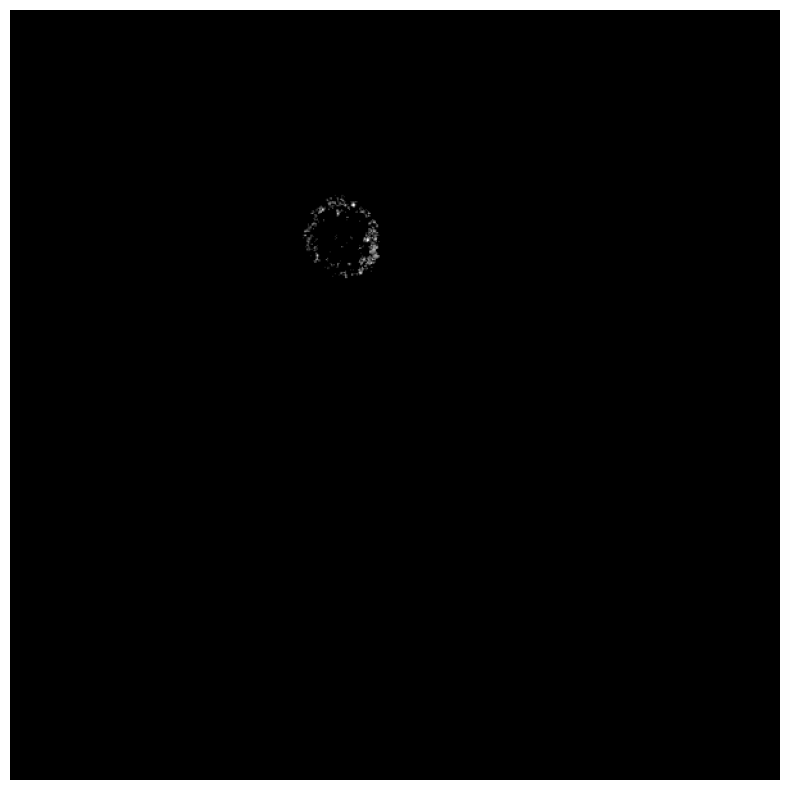

In [86]:
y0, x0, y1, x1 = [14000, 22000, 24000, 30000]
crop = (ys >= y0) & (ys < y1) & (xs >= x0) & (xs < x1)
xs_ = xs[crop]
ys_ = ys[crop]

cnts, _, _  = np.histogram2d(ys_, xs_, bins=np.arange(0, 60001, 100))
plt.figure(figsize=(10,10))
plt.imshow(np.log1p(cnts), cmap='gray')
plt.axis('off')


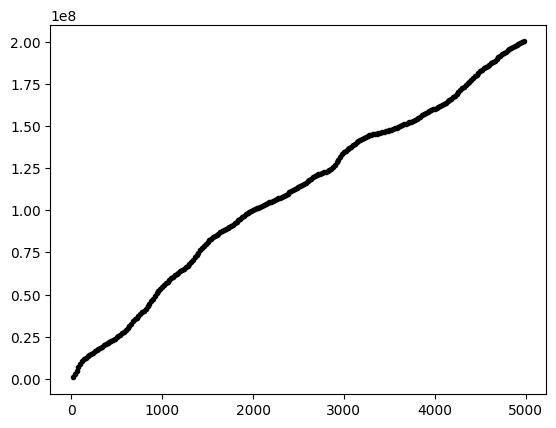

In [100]:
radii = list(range(20, 5000, 20))
k = ripleyk.calculate_ripley(radii, 10000, d1=xs_, d2=ys_, CSR_Normalise=True)

plt.plot(radii, k, "k.")

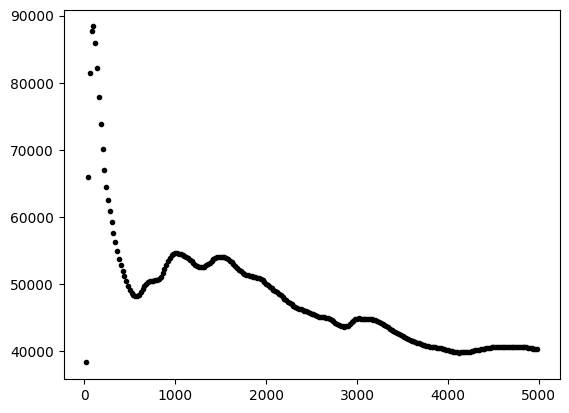

In [99]:
plt.plot(radii, np.array(k)/radii, "k.")